### Experiments based on projects done by other course students

In [0]:
!curl -s https://course.fast.ai/setup/colab | bash

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Data/"
base_dir = root_dir + 'fastai-v3/'

In [0]:
from fastai import *
from fastai.vision import *

### Handwritten Devnagiri character recognition
"DHCD dataset - A Devnagiri MNIST" - [posted here](https://forums.fast.ai/t/share-your-work-here/27676/38), [dataset](https://archive.ics.uci.edu/ml/datasets/Devanagari+Handwritten+Character+Dataset), [github code](https://gist.github.com/suvash/d9fe3aa8d570d42ab65175a057d402a4)

In [0]:
!wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip'

In [0]:
!unzip DevanagariHandwrittenCharacterDataset.zip

In [0]:
!(cd DevanagariHandwrittenCharacterDataset; mv Train train; mv Test valid)

In [23]:
path = Path("DevanagariHandwrittenCharacterDataset"); path.ls()

[PosixPath('DevanagariHandwrittenCharacterDataset/valid'),
 PosixPath('DevanagariHandwrittenCharacterDataset/train')]

In [0]:
data = ImageDataBunch.from_folder(path, size=26)

In [0]:
data.show_batch(rows=6, figsize=(11,11))

In [27]:
print(data.classes)

['character_10_yna', 'character_11_taamatar', 'character_12_thaa', 'character_13_daa', 'character_14_dhaa', 'character_15_adna', 'character_16_tabala', 'character_17_tha', 'character_18_da', 'character_19_dha', 'character_1_ka', 'character_20_na', 'character_21_pa', 'character_22_pha', 'character_23_ba', 'character_24_bha', 'character_25_ma', 'character_26_yaw', 'character_27_ra', 'character_28_la', 'character_29_waw', 'character_2_kha', 'character_30_motosaw', 'character_31_petchiryakha', 'character_32_patalosaw', 'character_33_ha', 'character_34_chhya', 'character_35_tra', 'character_36_gya', 'character_3_ga', 'character_4_gha', 'character_5_kna', 'character_6_cha', 'character_7_chha', 'character_8_ja', 'character_9_jha', 'digit_0', 'digit_1', 'digit_2', 'digit_3', 'digit_4', 'digit_5', 'digit_6', 'digit_7', 'digit_8', 'digit_9']


In [31]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 84966508.13it/s]


### Plant identification

Info - [posted here](https://forums.fast.ai/t/share-your-work-here/27676/5), [dataset](https://www.imageclef.org/2013/plant), [github code](https://gist.github.com/hkristen/696d5111692c25c9ae0d6949501e9215)

NB: Dataset is 3-4GB, so haven't completed it.

In [0]:
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import os

In [0]:
!wget http://otmedia.lirmm.fr/LifeCLEF/ImageCLEF2011-2012-2013/ImageCLEF2013PlantTaskTestAndTaskPackage.zip
!wget http://otmedia.lirmm.fr/LifeCLEF/ImageCLEF2011-2012-2013/ImageCLEF2013PlantTaskTrainPackage-PART-1.zip
!wget http://otmedia.lirmm.fr/LifeCLEF/ImageCLEF2011-2012-2013/ImageCLEF2013PlantTaskTrainPackage-PART-2.zip

### Recognise Artists (my own experiment)
Distinguish between paintings of Picasso, Cezanne, Van Gogh, Titian 

**Download Images**

Search for each artists images in Google Images, one artist at a time. Scroll down till the bottom until you see a button that says 'Show more results'.

Press CtrlShiftJ to open the browser's debug  'Console' and paste the following command, which will download a file containing URLs for all the images. Rename that file to <artist>_url.txt

urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [0]:
folder = 'picasso'
file = 'picasso_url.txt'

In [0]:
path = Path(base_dir + 'data/artists')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [46]:
download_images(path/file, dest, max_pics=200)

Error https://content3.cdnprado.net/imagenes/Documentos/imgsem/65/657f/657fa964-0040-48df-971e-88f0de5c6714/73389a57-cd89-42f6-9458-c3f635bfcd39.jpg HTTPSConnectionPool(host='content3.cdnprado.net', port=443): Read timed out. (read timeout=4)
Error https://content3.cdnprado.net/imagenes/Documentos/imgsem/0f/0f35/0f359b90-2055-4326-bbbe-775dbfa7c504/ea16571c-2e85-4603-9a17-69f777ef7449.jpg HTTPSConnectionPool(host='content3.cdnprado.net', port=443): Read timed out. (read timeout=4)
Error https://content3.cdnprado.net/imagenes/Documentos/imgsem/82/821a/821a6867-321a-4570-a19a-db4da7e2042c/e2377d3a-e928-41a3-062f-94417ba14df7.jpg HTTPSConnectionPool(host='content3.cdnprado.net', port=443): Read timed out. (read timeout=4)
Error https://content3.cdnprado.net/imagenes/Documentos/imgsem/a2/a27a/a27a3d6f-fe1c-4f66-b976-aa660b005784/d7f1538a-fb57-484a-8caf-487d53ac1761.jpg HTTPSConnectionPool(host='content3.cdnprado.net', port=443): Read timed out. (read timeout=4)


In [0]:
# We will repeat the above two steps with Cezanne images....
folder = 'cezanne'
file = 'cezanne_url.txt'

In [0]:
# We will repeat the steps with Van Gogh images....
folder = 'vangogh'
file = 'vangogh_url.txt'

In [0]:
# We will repeat the steps with Titian images....
folder = 'titian'
file = 'titian_url.txt'

In [0]:
# Then we can remove any images that can't be opened
classes = ['picasso','cezanne','vangogh', 'titian']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

**Load Image Data**

In [48]:
# Load image data from the downloaded folders
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

['cezanne', 'picasso', 'titian', 'vangogh']

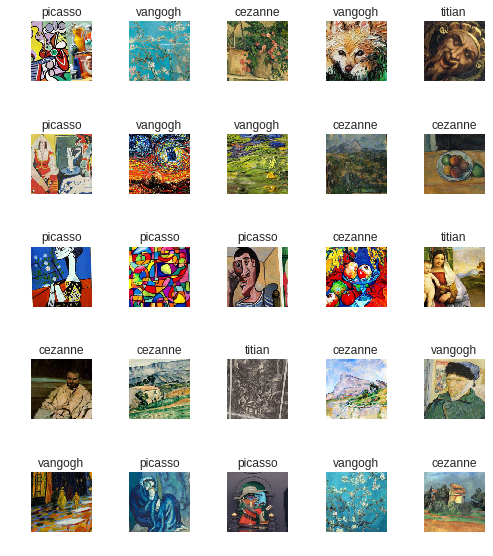

In [49]:
data.show_batch(rows=5, figsize=(7,8))

**Transfer Learning: Train a Resnet34 CNN**

In [51]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)

**Check Results**

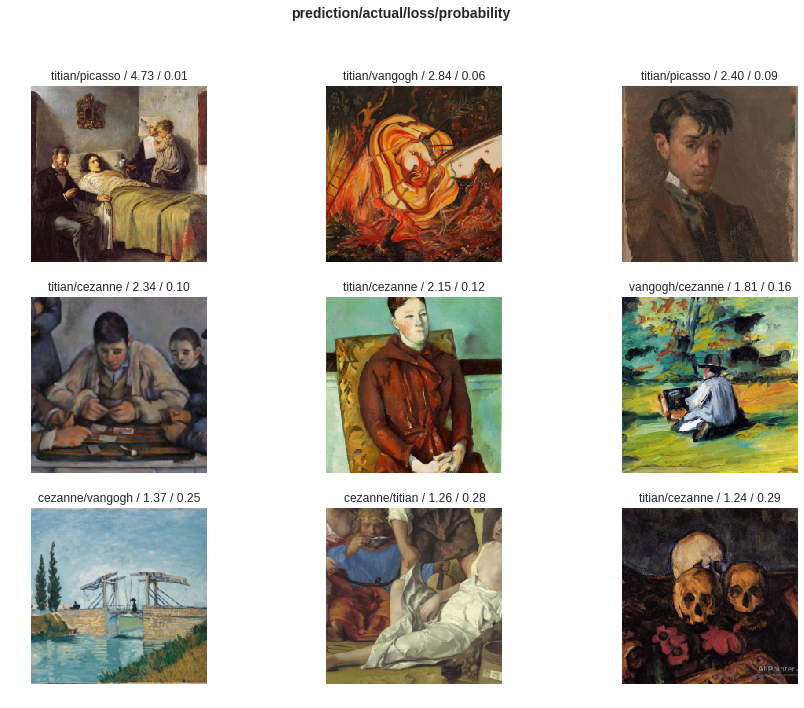

In [52]:
# Show predictions which were most incorrect
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11), heatmap = False)

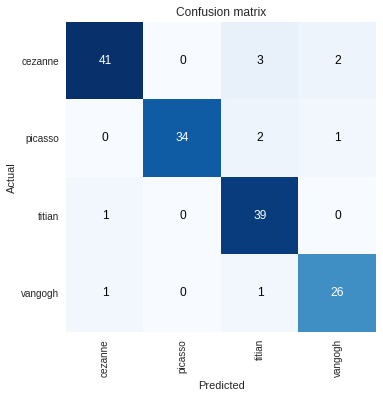

In [53]:
interp.plot_confusion_matrix()

**Re-learn by updating even the initial CNN layers (which were frozen before)**

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


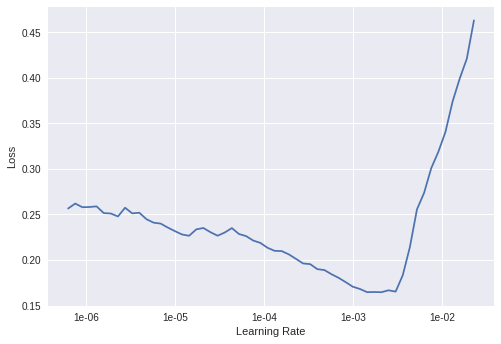

In [54]:
# Unfreeze the initial CNN layers so those weights can also get updated during learning
learn.unfreeze()

# Plot prediction loss against learning rate
learn.lr_find()
learn.recorder.plot()

In [57]:
learn.unfreeze()
learn.fit_one_cycle(8, max_lr=slice(1e-5,1e-3))

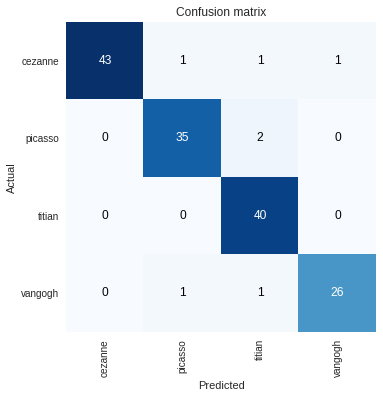

In [58]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [0]:
# Show correctly classified images as well
learn.show_results(rows=8, figsize=(7,8))

### Continue artist recognition - Use tSNE to visualise the classification results
Based on [this post](https://forums.fast.ai/t/share-your-work-here/27676/53), [github code](https://github.com/kheyer/ML-DL-Projects/blob/master/Pets%20TSNE/pets_tsne.ipynb)

**Explore the Results data structures - this is just experimentation**

Predicted values for item  44  are  tensor([2.4732e-06, 2.3686e-05, 9.9910e-01, 8.7868e-04]) and actual is  tensor(2)
Predicted Class is  titian
Actual class is  titian


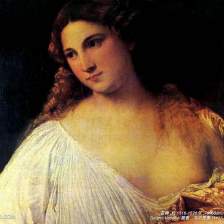

In [90]:
# Get predicted and actual values
preds = learn.get_preds()
y_pred = preds[0]
y_targ = preds[1]

# Sample item in validation data set
item = 44
# Sample item predicted values for each class and actual target value
print ('Predicted values for item ', item, ' are ', y_pred[item], 'and actual is ', y_targ[item])

#We can use a softmax function to turn the output vector into a vector of probabilities for the image beloning to each class.
# Get the class corresponding to the max probability
print ('Predicted Class is ', learn.data.classes[np.argmax(to_np(F.softmax(y_pred[item], dim=0)))])
print ('Actual class is ', learn.data.classes[to_np(y_targ[item])])

# Image corresponding to that item
learn.data.valid_ds[item][0]

**The real tSNE logic starts here**

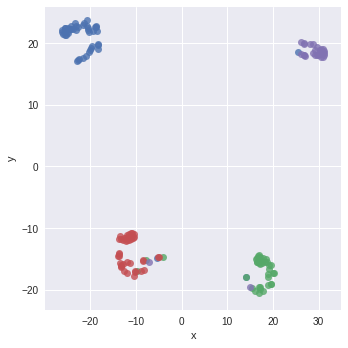

In [196]:
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import manifold, datasets
#from sklearn.metrics.pairwise import pairwise_distances
#from sklearn.metrics import confusion_matrix
#from scipy.spatial.distance import squareform
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#from matplotlib.ticker import NullFormatter
import PIL # Python Image Library

# We can perform t-SNE on our model's predicted value vectors. As these vectors are from 
# the final classification, we would expect them to cluster well.

# probs_trans is an array of [[x,y], ....] coordinates for each sample
probs_trans = manifold.TSNE(n_components=2, perplexity=15).fit_transform(y_pred)

# concat the x,y coordinates with the target label for each sample
# Each row is a sample, and the columns are [x, y, label]
prob_df = pd.DataFrame(np.concatenate((probs_trans, y_targ[:,None]), axis=1), columns=['x','y','labels'])

# Plot the tSNE visualisation
g = sns.lmplot('x', 'y', data=prob_df, hue='labels', fit_reg=False, legend=False)

# Add the actual images corresponding to each sample to the dataframe
# These images are Fastai Image classes and contain data of shape (3, width, height)
prob_df['img'] = learn.data.valid_ds.x

**Now plot the tSNE using image thumbnails instead of dots**

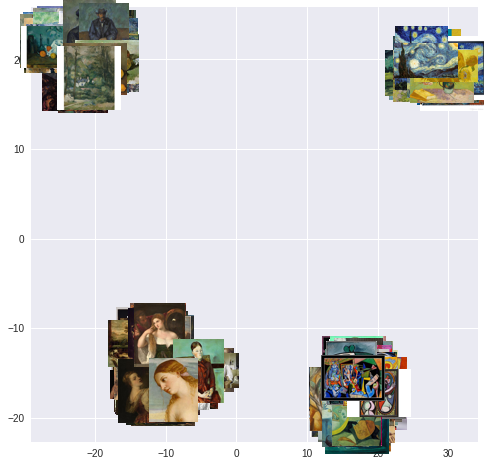

In [206]:
#--------------------------------------------------------------
# Convert Fastai Image class to a PIL Image class
#--------------------------------------------------------------
def convertFastImagetoPIL (imFast):
  # Numpy array of Fastai Image data
  # It's shape is (width, height, 3) for 3 RGB channels
  # Numbers are signed floats between 0-1
  imFastRaw = np.array (imFast.data)

  # Channel axis (ie. first axis) needs to be moved to last axis
  imFastSwap = np.swapaxes (imFastRaw, 0, 1).swapaxes (1, 2)

  # Scale the values from 0-1 to 0-255, round them to integer values and
  # convert to unsigned ints
  imFastArray = np.round(imFastSwap * 255).astype('uint8')

  # Now convert the transformed array to a PIL Image
  imPilConvert = Image.fromarray(imFastArray)
  return (imPilConvert)


def visualize_scatter_with_images(scaled_data, df, figsize=(8,8), image_zoom=1, suffix=1):
    fig, ax = plt.subplots(figsize=figsize)
    
    # NB: These are matplotlib artists, nothing to do with my artist recognition example
    artists = [] 
    
    # X and Y coordinates of data points
    xx = scaled_data[:,0]
    yy = scaled_data[:,1]
    
    # Loop through every data point
    for i, (x,y) in enumerate(zip(xx,yy)):
      
        # Get the Fastai Image and convert to PIL Image class
        imf = df['img'][i]
        im = convertFastImagetoPIL (imf)
        
        # Shrink to thumbnail size
        im.thumbnail((64,64))
        
        # Plot the thumbnail at the (x,y) coordinate of the data point
        img = OffsetImage(im, zoom=image_zoom, cmap='gray')
        ab = AnnotationBbox(img, (x, y), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
   
    ax.update_datalim(np.column_stack([xx,yy]))
    ax.autoscale()
    
    #fig.savefig(f'TSNE_{suffix}.jpg', bbox_inches = 'tight')
    return fig, ax
  
fig, ax = visualize_scatter_with_images(probs_trans, prob_df, image_zoom=1, suffix='probabilities')
plt.show()

### Image Manipulation (using PIL Python Image Library and Fastai Image class)
Depends on first running the Artists Recognition

**Example: Use PIL to open and manipulate an image**

PIL version is  4.1.1


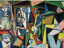

In [201]:
from PIL import Image               # to load images
print('PIL version is ', PIL.PILLOW_VERSION)

from IPython.display import display # to display images

# Load the image from a file
imPil = PIL.Image.open(path/'picasso/00000196.jpg')

# Shrink that image to a thumbnail
imPil.thumbnail((64,64))

# Display the image
display(imPil)

**Example: Use Fastai Image class to manipulate an image**

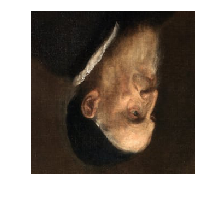

In [202]:
# Get the 4th image from the tSNE data above
imFast = prob_df['img'][4]

# Rotate it
imFast.rotate(180).show()

**Example: Convert from Fastai Image class to PIL Image class**

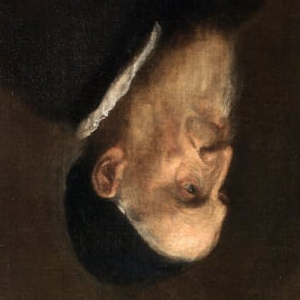

In [203]:
# Numpy array of PIL image data - just to see it's format
imPilArray = np.array(imPil)

# Shape is (3, width, height) for 3 RGB channels
# Also, the numbers are unsigned ints between 0-255
imPilArray.shape

# Numpy array of Fastai Image data
# It's shape is (width, height, 3) for 3 RGB channels
# Numbers are signed floats between 0-1
imFastRaw = np.array (imFast.data)

# Channel axis (ie. first axis) needs to be moved to last axis
imFastSwap = np.swapaxes (imFastRaw, 0, 1).swapaxes (1, 2)

# Scale the values from 0-1 to 0-255, round them to integer values and
# convert to unsigned ints
imFastArray = np.round(imFastSwap * 255).astype('uint8')

# Now convert the transformed array to a PIL Image
imPilConvert = Image.fromarray(imFastArray)

display (imPilConvert)

###Basic Animation with matplotlib - see [example](https://riptutorial.com/matplotlib/example/23558/basic-animation-with-funcanimation) and [example2](https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/)

Animating gradient descent - [posted here](https://forums.fast.ai/t/share-your-work-here/27676/300), [notebook](https://nbviewer.jupyter.org/gist/joshfp/85d96f07aaa5f4d2c9eb47956ccdcc88/lesson2-sgd-in-action.ipynb)

In [218]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    #if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()
        
def mse(y_hat, y): return ((y_hat-y)**2).mean()

n=100
a = tensor(3.,2)
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
y = x@a + torch.rand(n)
lr = 1e-1

a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
line, = plt.plot(x[:,0], x@a)
plt.close()

def animate(i):
    update()
    line.set_ydata(x@a)
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

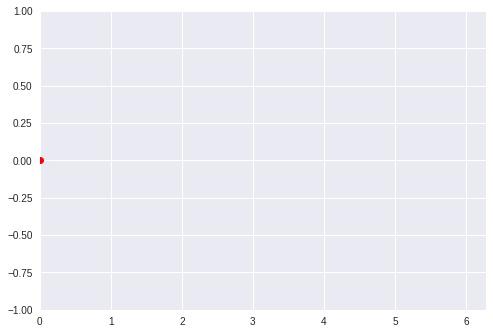

In [214]:
#import numpy as np
#import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')

TWOPI = 2*np.pi

fig, ax = plt.subplots()

#t = np.arange(0.0, TWOPI, 0.001)
#s = np.sin(t)
#l = plt.plot(t, s)

ax = plt.axis([0,TWOPI,-1,1])

redDot, = plt.plot([0], [np.sin(0)], 'ro')

def animate(i):
    redDot.set_data(i, np.sin(i))
    return redDot,

# create animation using the animate() function
animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)
#myAnimation = animation.FuncAnimation(fig, animate, frames=np.arange(0.0, TWOPI, 0.1), interval=10, blit=True, repeat=True)

plt.show()

### Classifying ordinary sounds using spectrogram images

Example - [posted here](https://forums.fast.ai/t/share-your-work-here/27676/40), [notebook](https://github.com/etown/dl1/blob/master/UrbanSoundClassification.ipynb)